In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer 



In [2]:
X=pd.read_csv("C:/Users/lenovo/OneDrive/Desktop/DAN-P9-data/fichier_final_iteration2.csv",encoding = 'utf8')
X.head()

Zone  Disponibilite_autres_viandes  Disponibilite_cereales  \
0     Afghanistan                         260.0                    10.0   
1  Afrique du Sud                        1404.0                    75.0   
2         Albanie                          89.0                     0.0   
3         Algérie                         490.0                     8.0   
4       Allemagne                        5475.0                  2228.0   

   Disponibilite_volaille  Exportations_autres_viandes  Exportations_cereales  \
0                    57.0                          0.0                    0.0   
1                  2118.0                         76.0                   16.0   
2                    47.0                          0.0                    0.0   
3                   277.0                          0.0                    0.0   
4                  1739.0                       2956.0                  250.0   

   Exportations_volaille  Importations_autres_viandes  Importations_cereales  \
0                    0.0                          6.0                    0.0   
1                   63.0                         56.0                   15.0   
2                    0.0                         12.0                    1.0   
3                    0.0                         50.0                    8.0   
4                  646.0                       1725.0                  416.0   

   Importations_volaille  ...  Pertes_autres_viandes  Pertes_cereales  \
0                   29.0  ...                   14.0              0.0   
1                  514.0  ...                   71.0              1.0   
2                   38.0  ...                    0.0              0.0   
3                    2.0  ...                   22.0              0.0   
4                  842.0  ...                    5.0             73.0   

   Pertes_volaille  Production_autres_viandes  Production_cereales  \
0              2.0                      254.0                  9.0   
1             83.0                     1420.0                 74.0   
2              0.0                       77.0                  0.0   
3             13.0                      440.0                  0.0   
4              0.0                     6675.0               2360.0   

   Production_volaille  Population           PIB  Valeur_ajoutee_agriculture  \
0                 28.0   36296.113  1.889635e+04                 4992.453824   
1               1667.0   57009.756  3.808514e+05                 9497.680787   
2                 13.0    2884.169  1.301973e+04                 2476.629502   
3                275.0   41389.189  1.700970e+05                19996.432170   
4               1514.0   82658.409  3.690849e+06                31436.767780   

   Stabilite_politique  
0                -2.80  
1                -0.28  
2                 0.38  
3                -0.92  
4                 0.59  

[5 rows x 23 columns]

In [3]:
X[X.Zone.str.contains('Chine')]

Zone  Disponibilite_autres_viandes  \
30  Chine - RAS de Hong-Kong                         920.0   

    Disponibilite_cereales  Disponibilite_volaille  \
30                    16.0                   280.0   

    Exportations_autres_viandes  Exportations_cereales  Exportations_volaille  \
30                        171.0                   13.0                  663.0   

    Importations_autres_viandes  Importations_cereales  Importations_volaille  \
30                        952.0                   30.0                  907.0   

    ...  Pertes_autres_viandes  Pertes_cereales  Pertes_volaille  \
30  ...                    0.0              0.0              0.0   

    Production_autres_viandes  Production_cereales  Production_volaille  \
30                      123.0                  0.0                 24.0   

    Population       PIB  Valeur_ajoutee_agriculture  Stabilite_politique  
30    7306.322  341271.1                  222.756873                 0.83  

[1 rows x 23 columns]

In [4]:
X.set_index('Zone', inplace=True)

In [5]:
sc = StandardScaler()
Z = pd.DataFrame(sc.fit_transform(X), columns=X.columns,index=X.index)
Z

Disponibilite_autres_viandes  Disponibilite_cereales  \
Zone                                                                        
Afghanistan                             -0.293049               -0.336371   
Afrique du Sud                           0.784208               -0.205072   
Albanie                                 -0.454072               -0.356571   
Algérie                                 -0.076467               -0.340411   
Allemagne                                4.617700                4.143951   
...                                           ...                     ...   
Zimbabwe                                -0.392865               -0.251532   
Égypte                                   0.559152               -0.354551   
Émirats arabes unis                     -0.323182               -0.308091   
Équateur                                -0.108484               -0.352531   
Îles Salomon                            -0.533172               -0.356571   

                     Disponibilite_volaille  Exportations_autres_viandes  \
Zone                                                                       
Afghanistan                       -0.474075                    -0.307322   
Afrique du Sud                     2.371994                    -0.116313   
Albanie                           -0.487884                    -0.307322   
Algérie                           -0.170273                    -0.307322   
Allemagne                          1.848627                     7.121916   
...                                     ...                          ...   
Zimbabwe                          -0.447837                    -0.307322   
Égypte                             1.173359                    -0.304809   
Émirats arabes unis                0.016151                    -0.262083   
Équateur                          -0.081894                    -0.307322   
Îles Salomon                      -0.548644                    -0.307322   

                     Exportations_cereales  Exportations_volaille  \
Zone                                                                
Afghanistan                      -0.320062              -0.338635   
Afrique du Sud                   -0.048226               0.159231   
Albanie                          -0.320062              -0.338635   
Algérie                          -0.320062              -0.338635   
Allemagne                         3.927376               4.766467   
...                                    ...                    ...   
Zimbabwe                         -0.320062              -0.338635   
Égypte                           -0.286082              -0.330733   
Émirats arabes unis              -0.184144               0.404212   
Équateur                         -0.286082              -0.338635   
Îles Salomon                     -0.320062              -0.338635   

                     Importations_autres_viandes  Importations_cereales  \
Zone                                                                      
Afghanistan                            -0.389234              -0.354573   
Afrique du Sud                         -0.237989              -0.019429   
Albanie                                -0.371085              -0.332230   
Algérie                                -0.256139              -0.175830   
Allemagne                               4.810555               8.940108   
...                                          ...                    ...   
Zimbabwe                               -0.404358              -0.354573   
Égypte                                  0.273217              -0.287544   
Émirats arabes unis                     0.128022               0.338059   
Équateur                               -0.404358              -0.332230   
Îles Salomon                           -0.404358              -0.354573   

                     Importations_volaille  Nourriture_autres_viandes  ...  \
Zone                                                                   ...   


In [6]:
kmo_all,kmo_model=calculate_kmo(Z)
kmo_model

C:\Users\lenovo\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.6938324647341321

### KMO selon la charte qui est moyen

In [7]:
n_comp=3
fa = FactorAnalyzer(rotation = 'varimax',impute = "drop",n_factors=n_comp)
coord=fa.fit_transform(Z)

results=pd.DataFrame(fa.get_communalities(),columns=['communalities'])
results=results.join(pd.DataFrame(fa.loadings_))
results['components']=results.index+1
results['eigen_values']=fa.get_eigenvalues()[0]
results['variance_%']=list(fa.get_factor_variance()[1])+[None]*(results.shape[0]-n_comp)
results['cumulative_variance_%']=list(fa.get_factor_variance()[2])+[None]*(results.shape[0]-n_comp)

results.index=Z.columns
results

communalities         0         1         2  \
Disponibilite_autres_viandes       0.905217  0.673103  0.660133  0.127958   
Disponibilite_cereales             0.955761  0.091911  0.302115  0.925225   
Disponibilite_volaille             0.910189  0.880027  0.368083  0.016026   
Exportations_autres_viandes        0.589710  0.025447  0.765213  0.059255   
Exportations_cereales              0.388107  0.146791  0.593949  0.117407   
Exportations_volaille              0.410243  0.083050  0.630423  0.076895   
Importations_autres_viandes        0.682122  0.359815  0.743319 -0.011482   
Importations_cereales              0.633804  0.120415  0.781967  0.088495   
Importations_volaille              0.439333  0.332906  0.570794 -0.051966   
Nourriture_autres_viandes          0.900733  0.666314  0.662633  0.132953   
Nourriture_cereales                0.788547  0.016327 -0.149202  0.875225   
Nourriture_volaille                0.876873  0.849695  0.392844  0.023781   
Pertes_autres_viandes              0.359293  0.562064  0.207900 -0.012445   
Pertes_cereales                    0.903956  0.015504  0.043477  0.949645   
Pertes_volaille                    0.344523  0.580830 -0.032537 -0.078107   
Production_autres_viandes          0.862787  0.564009  0.720766  0.158670   
Production_cereales                0.950551  0.092778  0.323983  0.914865   
Production_volaille                0.879534  0.855760  0.380967  0.045523   
Population                         0.713634  0.815074  0.097697  0.199360   
PIB                                0.755281  0.413395  0.762816  0.049973   
Valeur_ajoutee_agriculture         0.670300  0.780090  0.184979  0.165960   
Stabilite_politique                0.281063 -0.319996  0.308091 -0.289388   

                              components  eigen_values  variance_%  \
Disponibilite_autres_viandes           1      9.915787    0.270219   
Disponibilite_cereales                 2      3.460951    0.256369   
Disponibilite_volaille                 3      2.624796    0.164393   
Exportations_autres_viandes            4      1.222581         NaN   
Exportations_cereales                  5      0.969491         NaN   
Exportations_volaille                  6      0.788098         NaN   
Importations_autres_viandes            7      0.727540         NaN   
Importations_cereales                  8      0.593211         NaN   
Importations_volaille                  9      0.443533         NaN   
Nourriture_autres_viandes             10      0.348595         NaN   
Nourriture_cereales                   11      0.300249         NaN   
Nourriture_volaille                   12      0.203782         NaN   
Pertes_autres_viandes                 13      0.175291         NaN   
Pertes_cereales                       14      0.096704         NaN   
Pertes_volaille                       15      0.052888         NaN   
Production_autres_viandes             16      0.043037         NaN   
Production_cereales                   17      0.028088         NaN   
Production_volaille                   18      0.002409         NaN   
Population                            19      0.001194         NaN   
PIB                                   20      0.000989         NaN   
Valeur_ajoutee_agriculture            21      0.000594         NaN   
Stabilite_politique                   22      0.000192         NaN   

                              cumulative_variance_%  
Disponibilite_autres_viandes               0.270219  
Disponibilite_cereales                     0.526587  
Disponibilite_volaille                     0.690980  
Exportations_autres_viandes                     NaN  
Exportations_cereales                           NaN  
Exportations_volaille                           NaN  
Importations_autres_viandes                     NaN  
Importations_cereales                           NaN  
Importations_volaille                           NaN  
Nourriture_autres_viandes                       NaN  
Nourriture_cereales                             NaN  

### Communalities : on supprime les variables qui sont expliquees a moins de 30% 

In [8]:
Z.drop(columns=['Stabilite_politique','Importations_volaille'],inplace=True)
Z.head()

Disponibilite_autres_viandes  Disponibilite_cereales  \
Zone                                                                   
Afghanistan                        -0.293049               -0.336371   
Afrique du Sud                      0.784208               -0.205072   
Albanie                            -0.454072               -0.356571   
Algérie                            -0.076467               -0.340411   
Allemagne                           4.617700                4.143951   

                Disponibilite_volaille  Exportations_autres_viandes  \
Zone                                                                  
Afghanistan                  -0.474075                    -0.307322   
Afrique du Sud                2.371994                    -0.116313   
Albanie                      -0.487884                    -0.307322   
Algérie                      -0.170273                    -0.307322   
Allemagne                     1.848627                     7.121916   

                Exportations_cereales  Exportations_volaille  \
Zone                                                           
Afghanistan                 -0.320062              -0.338635   
Afrique du Sud              -0.048226               0.159231   
Albanie                     -0.320062              -0.338635   
Algérie                     -0.320062              -0.338635   
Allemagne                    3.927376               4.766467   

                Importations_autres_viandes  Importations_cereales  \
Zone                                                                 
Afghanistan                       -0.389234              -0.354573   
Afrique du Sud                    -0.237989              -0.019429   
Albanie                           -0.371085              -0.332230   
Algérie                           -0.256139              -0.175830   
Allemagne                          4.810555               8.940108   

                Nourriture_autres_viandes  Nourriture_cereales  \
Zone                                                             
Afghanistan                     -0.296059            -0.216047   
Afrique du Sud                   0.758157            -0.049330   
Albanie                         -0.446251            -0.247971   
Algérie                         -0.082728            -0.237330   
Allemagne                        4.701423            -0.177028   

                Nourriture_volaille  Pertes_autres_viandes  Pertes_cereales  \
Zone                                                                          
Afghanistan               -0.466745               0.010880        -0.269980   
Afrique du Sud             2.397999               1.547009        -0.248504   
Albanie                   -0.478320              -0.366415        -0.269980   
Algérie                   -0.164356               0.226477        -0.269980   
Allemagne                  1.781645              -0.231666         1.297745   

                Pertes_volaille  Production_autres_viandes  \
Zone                                                         
Afghanistan           -0.229834                  -0.290574   
Afrique du Sud         2.203012                   0.817772   
Albanie               -0.289904                  -0.458823   
Algérie                0.100552                  -0.113771   
Allemagne             -0.289904                   5.812935   

                Production_cereales  Production_volaille  Population  \
Zone                                                                   
Afghanistan               -0.342705            -0.496969    0.305437   
Afrique du Sud            -0.213665             1.874197    0.826797   
Albanie                   -0.360572            -0.518670   -0.535539   
Algérie                   -0.360572            -0.139631    0.433629   
Allemagne                  4.324576             1.652850    1.472371   

                     PIB  Valeur_ajoutee_agriculture  
Zone                                                  
Afghan

In [9]:
n_comp=3
fa = FactorAnalyzer(rotation = 'varimax',impute = "drop",n_factors=n_comp)
coord=fa.fit_transform(Z)

results=pd.DataFrame(fa.get_communalities(),columns=['communalities'])
results=results.join(pd.DataFrame(fa.loadings_))
results['components']=results.index+1
results['eigen_values']=fa.get_eigenvalues()[0]
results['variance_%']=list(fa.get_factor_variance()[1])+[None]*(results.shape[0]-n_comp)
results['cumulative_variance_%']=list(fa.get_factor_variance()[2])+[None]*(results.shape[0]-n_comp)

results.index=Z.columns
results

communalities         0         1         2  \
Disponibilite_autres_viandes       0.905478  0.704089  0.627387  0.126975   
Disponibilite_cereales             0.951144  0.105761  0.301578  0.921417   
Disponibilite_volaille             0.913338  0.902155  0.314632  0.021475   
Exportations_autres_viandes        0.633094  0.048436  0.792715  0.048476   
Exportations_cereales              0.420603  0.163661  0.618797  0.104440   
Exportations_volaille              0.421877  0.095006  0.638923  0.068039   
Importations_autres_viandes        0.609263  0.410912  0.663527  0.012104   
Importations_cereales              0.660497  0.139787  0.796824  0.077639   
Nourriture_autres_viandes          0.902231  0.697347  0.631396  0.131441   
Nourriture_cereales                0.803747  0.012404 -0.156829  0.882609   
Nourriture_volaille                0.874602  0.869729  0.342615  0.028079   
Pertes_autres_viandes              0.358759  0.565370  0.196938 -0.018180   
Pertes_cereales                    0.929909  0.026364  0.029455  0.963507   
Pertes_volaille                    0.351838  0.584851 -0.066398 -0.073339   
Production_autres_viandes          0.890497  0.588287  0.723272  0.145926   
Production_cereales                0.944089  0.105897  0.327853  0.908508   
Production_volaille                0.890437  0.876564  0.346701  0.043251   
Population                         0.668985  0.791318  0.096723  0.182878   
PIB                                0.711141  0.458827  0.704714  0.063228   
Valeur_ajoutee_agriculture         0.658116  0.775913  0.180434  0.153358   

                              components  eigen_values  variance_%  \
Disponibilite_autres_viandes           1      9.526966    0.300851   
Disponibilite_cereales                 2      3.377847    0.247616   
Disponibilite_volaille                 3      2.320669    0.176514   
Exportations_autres_viandes            4      1.111691         NaN   
Exportations_cereales                  5      0.857005         NaN   
Exportations_volaille                  6      0.710721         NaN   
Importations_autres_viandes            7      0.582511         NaN   
Importations_cereales                  8      0.419587         NaN   
Nourriture_autres_viandes              9      0.371931         NaN   
Nourriture_cereales                   10      0.258922         NaN   
Nourriture_volaille                   11      0.184722         NaN   
Pertes_autres_viandes                 12      0.098607         NaN   
Pertes_cereales                       13      0.062594         NaN   
Pertes_volaille                       14      0.054564         NaN   
Production_autres_viandes             15      0.046156         NaN   
Production_cereales                   16      0.012447         NaN   
Production_volaille                   17      0.001198         NaN   
Population                            18      0.001048         NaN   
PIB                                   19      0.000617         NaN   
Valeur_ajoutee_agriculture            20      0.000197         NaN   

                              cumulative_variance_%  
Disponibilite_autres_viandes               0.300851  
Disponibilite_cereales                     0.548468  
Disponibilite_volaille                     0.724982  
Exportations_autres_viandes                     NaN  
Exportations_cereales                           NaN  
Exportations_volaille                           NaN  
Importations_autres_viandes                     NaN  
Importations_cereales                           NaN  
Nourriture_autres_viandes                       NaN  
Nourriture_cereales                             NaN  
Nourriture_volaille                             NaN  
Pertes_autres_viandes                           NaN  
Pertes_cereales                                 NaN  
Pertes_volaille                                 NaN  
Production_autres_viandes                       NaN  
Production_cereales                             NaN  
Production_volaille    

### les communalities sont toutes superieure 0,30 et sont expliquees toute a plus de 30% par l'ACP

les valeurs propres, en appliquant cette regle on garde que 3 facteurs soit les 3 premmiers facteurs,superieurs a 1

les 3 facteurs expliquent 82% de la variance de toutes les variables(45-24-12%)

### le facteur 0 designe le developpement general
### le facteur 1 designe le developpement agricole
### le facteur2 designe l'autosuffisance en cereales

In [10]:
p=Z.shape[1]
n=Z.shape[0]

In [11]:
plt.scatter(range(1,p+1),results.eigen_values)
plt.plot(range(1,p+1),results.eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.xticks(np.arange(0, p+1, step=1))
plt.grid()

In [12]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(results.iloc[:,1:n_comp+1], vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f");

In [13]:
x, y = 0,1
plt.figure(figsize=(10, 9))
for i in range(p):
    plt.subplot(111) 
    plt.arrow(0,
             0,
             results.iloc[i, x+1], 
             results.iloc[i, y+1],
             head_width=0.07,
             head_length=0.07, 
             width=0.02)

    plt.text(results.iloc[i, x+1] + 0.05,
             results.iloc[i, y+1] + 0.05,
             results.index[i])



plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


v1 = str(x)
v2 = str(y)


plt.xlabel(f'F{x+1} {v1}')
plt.ylabel(f'F{y+1} {v2}')


plt.grid()


plt.title('Arrow Plot of Principal Components')

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)

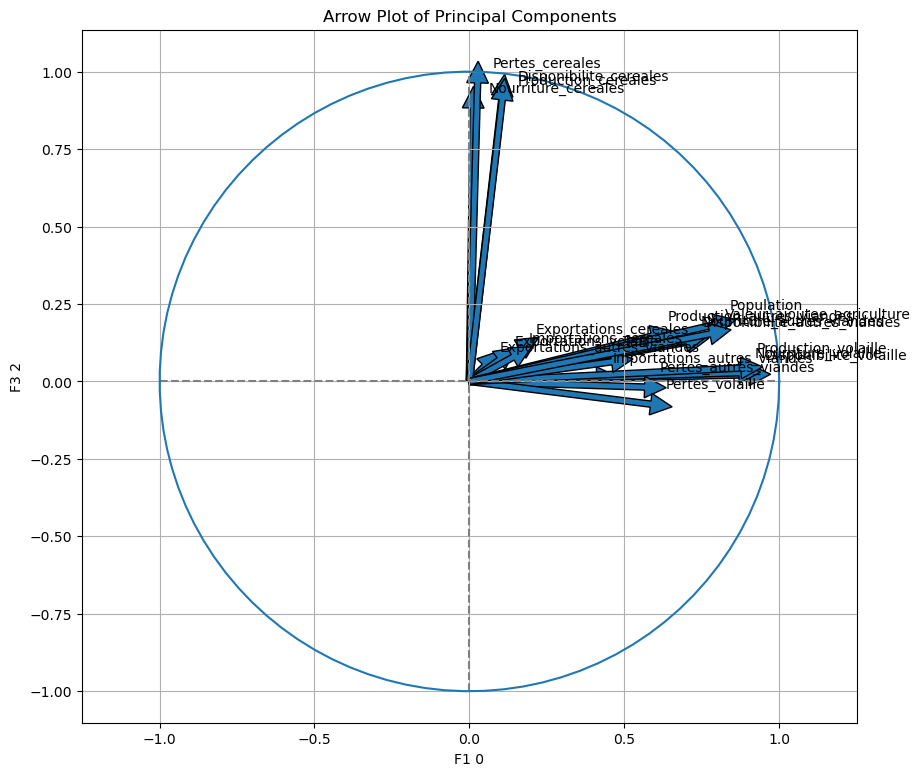

In [14]:
x, y = 0,2
plt.figure(figsize=(10, 9))
for i in range(p):
    plt.subplot(111) 
    plt.arrow(0,
             0,
             results.iloc[i, x+1], 
             results.iloc[i, y+1],
             head_width=0.07,
             head_length=0.07, 
             width=0.02)

    plt.text(results.iloc[i, x+1] + 0.05,
             results.iloc[i, y+1] + 0.05,
             results.index[i])



plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


v1 = str(x)
v2 = str(y)


plt.xlabel(f'F{x+1} {v1}')
plt.ylabel(f'F{y+1} {v2}')


plt.grid()


plt.title('Arrow Plot of Principal Components')

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)

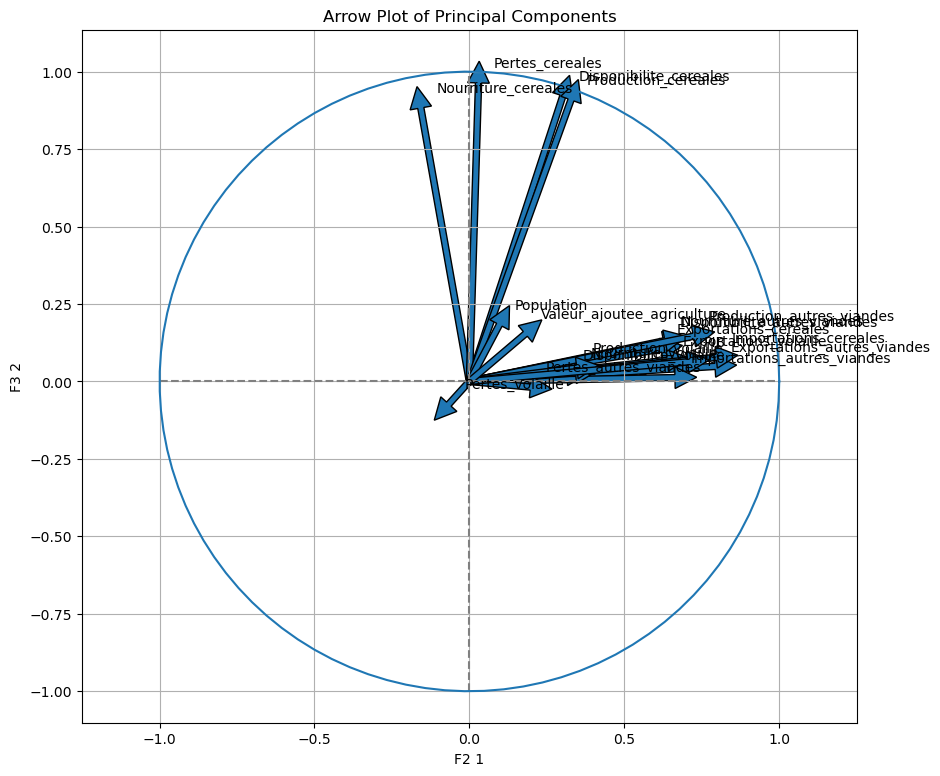

In [15]:
x, y = 1,2
plt.figure(figsize=(10, 9))
for i in range(p):
    plt.subplot(111) 
    plt.arrow(0,
             0,
             results.iloc[i, x+1], 
             results.iloc[i, y+1],
             head_width=0.07,
             head_length=0.07, 
             width=0.02)

    plt.text(results.iloc[i, x+1] + 0.05,
             results.iloc[i, y+1] + 0.05,
             results.index[i])



plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


v1 = str(x)
v2 = str(y)


plt.xlabel(f'F{x+1} {v1}')
plt.ylabel(f'F{y+1} {v2}')


plt.grid()


plt.title('Arrow Plot of Principal Components')

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)

In [16]:
df_pca=pd.DataFrame(coord)
columns=['developpement_general','developpement_agricol','autosuffisance_cereales']
df_pca.columns=columns
df_pca.index=Z.index
df_pca.head()

developpement_general  developpement_agricol  \
Zone                                                           
Afghanistan                  0.231270              -0.613609   
Afrique du Sud               1.812611              -0.467554   
Albanie                     -0.578822              -0.167036   
Algérie                     -0.135029              -0.126307   
Allemagne                   -1.061923               8.718723   

                autosuffisance_cereales  
Zone                                     
Afghanistan                   -0.234108  
Afrique du Sud                -0.376267  
Albanie                       -0.258953  
Algérie                       -0.204865  
Allemagne                      1.392404

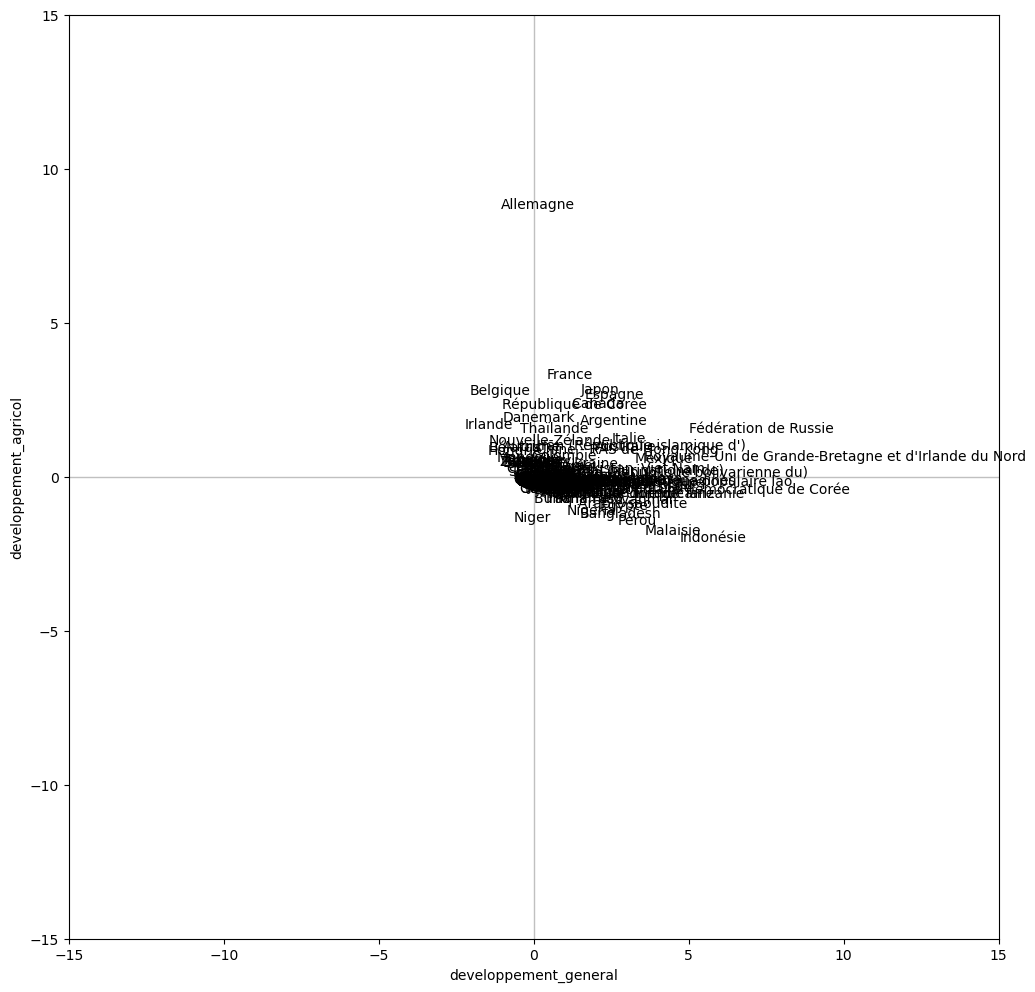

In [17]:
plan=(0,1)
s=15
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-s,s) #même limites en abscisse
axes.set_ylim(-s,s) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df_pca.index[i],(df_pca[df_pca.columns[plan[0]]][i],df_pca[df_pca.columns[plan[1]]][i]))
plt.xlabel(df_pca.columns[plan[0]])
plt.ylabel(df_pca.columns[plan[1]])
#ajouter les axes
plt.plot([-s,s],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-s,s],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [18]:
## l'Inde Chine et USA -> pays aberrant il faudra le traiter a part 

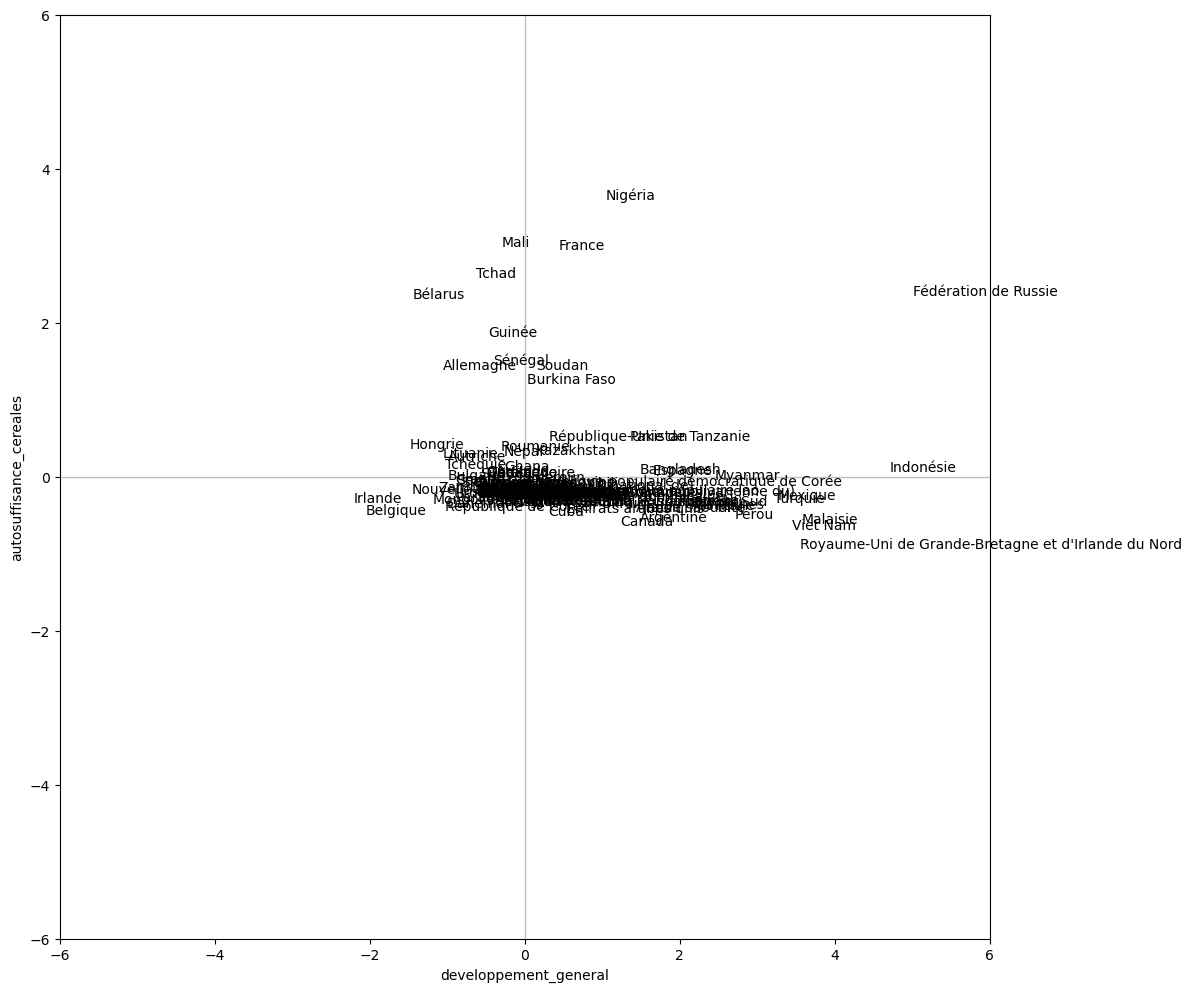

In [19]:
plan=(0,2)
fig, axes = plt.subplots(figsize=(12,12))
s=6
axes.set_xlim(-s,s) #même limites en abscisse
axes.set_ylim(-s,s) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df_pca.index[i],(df_pca[df_pca.columns[plan[0]]][i],df_pca[df_pca.columns[plan[1]]][i]))
plt.xlabel(df_pca.columns[plan[0]])
plt.ylabel(df_pca.columns[plan[1]])
#ajouter les axes
plt.plot([-s,s],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-s,s],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [20]:
# bresil comme pays aberrant

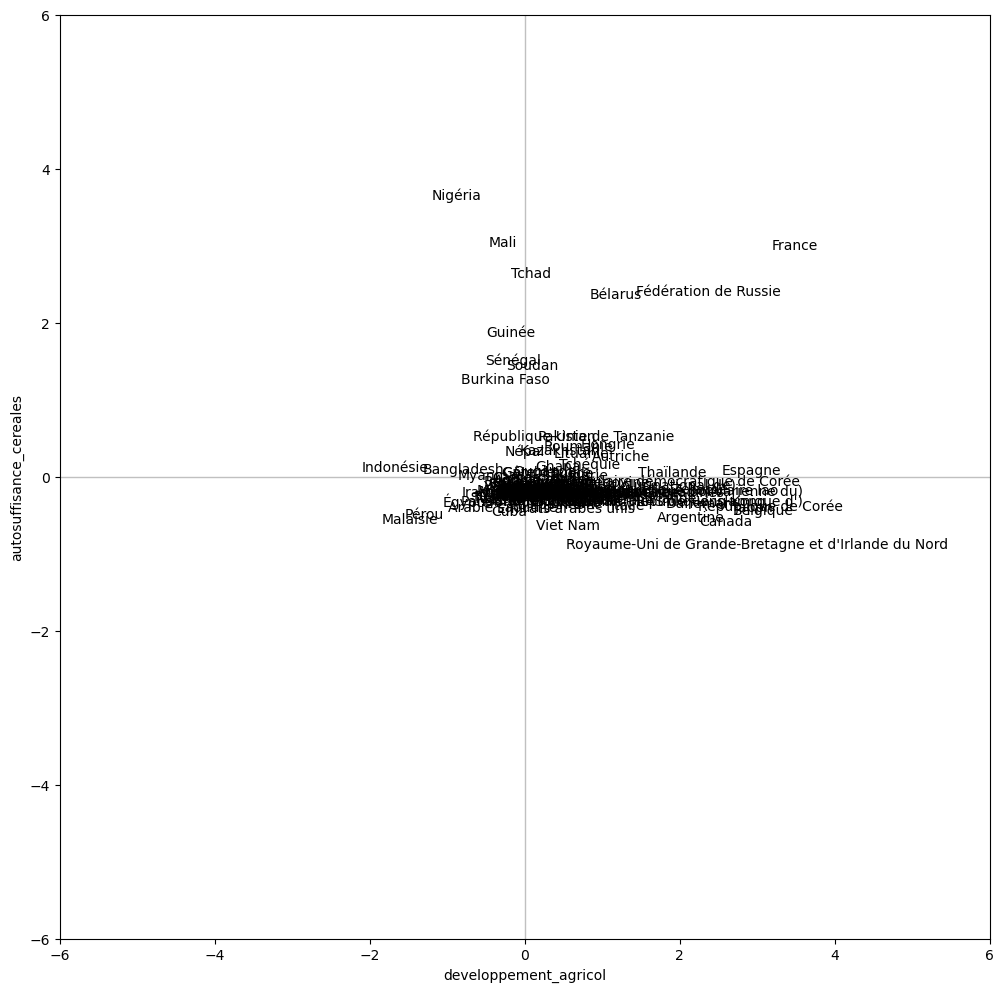

In [21]:
plan=(1,2)
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df_pca.index[i],(df_pca[df_pca.columns[plan[0]]][i],df_pca[df_pca.columns[plan[1]]][i]))
plt.xlabel(df_pca.columns[plan[0]])
plt.ylabel(df_pca.columns[plan[1]])
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

# clusterings

https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


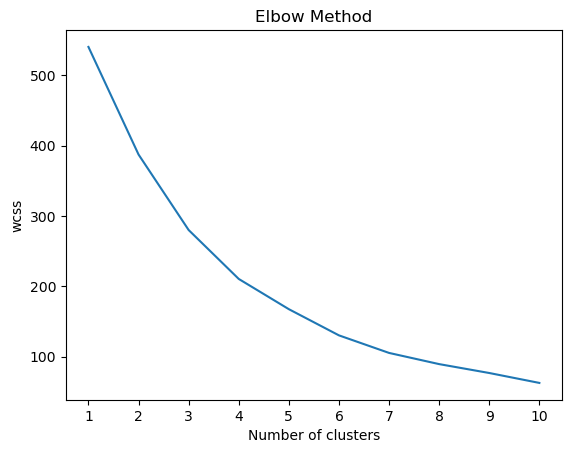

In [22]:
X=df_pca
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.xticks(range(1,11))
plt.show()

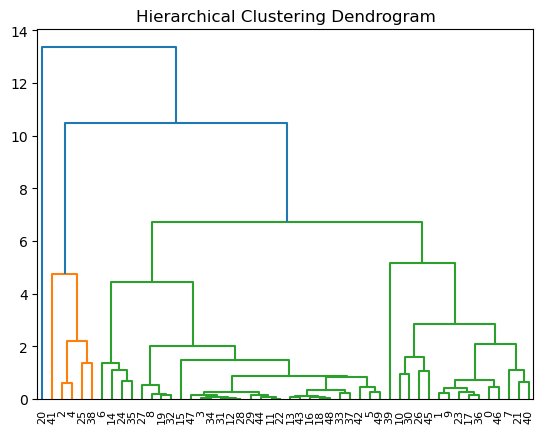

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z2 = linkage(df_pca.sample(n=50), method="ward")
pd.DataFrame(Z2)
_ = dendrogram(Z2)

plt.title("Hierarchical Clustering Dendrogram")
plt.axhline(y=40, color='red', linestyle='--', label='y = 20')
plt.show()

In [24]:
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
X['clusters']=y_means
X.head(10)

developpement_general  developpement_agricol  \
Zone                                                               
Afghanistan                      0.231270              -0.613609   
Afrique du Sud                   1.812611              -0.467554   
Albanie                         -0.578822              -0.167036   
Algérie                         -0.135029              -0.126307   
Allemagne                       -1.061923               8.718723   
Angola                          -0.094957              -0.398527   
Antigua-et-Barbuda              -0.493559              -0.277450   
Arabie saoudite                  1.429102              -0.987902   
Argentine                        1.480474               1.706840   
Arménie                         -0.652733              -0.058690   

                    autosuffisance_cereales  clusters  
Zone                                                   
Afghanistan                       -0.234108         0  
Afrique du Sud                    -0.376267         1  
Albanie                           -0.258953         0  
Algérie                           -0.204865         0  
Allemagne                          1.392404         2  
Angola                            -0.097201         0  
Antigua-et-Barbuda                -0.251615         0  
Arabie saoudite                   -0.453273         1  
Argentine                         -0.577697         1  
Arménie                           -0.254330         0

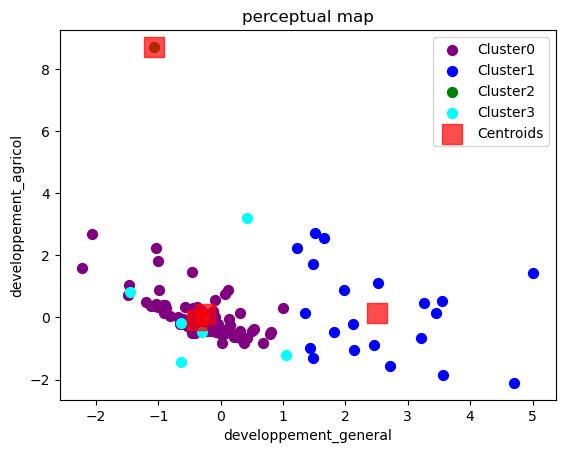

In [25]:
plan=(0,1)
plt.scatter(X[y_means==0][X.columns[plan[0]]],X[y_means==0][X.columns[plan[1]]],s=50, c='purple',label='Cluster0')
plt.scatter(X[y_means==1][X.columns[plan[0]]],X[y_means==1][X.columns[plan[1]]],s=50, c='blue',label='Cluster1')
plt.scatter(X[y_means==2][X.columns[plan[0]]],X[y_means==2][X.columns[plan[1]]],s=50, c='green',label='Cluster2')
plt.scatter(X[y_means==3][X.columns[plan[0]]],X[y_means==3][X.columns[plan[1]]],s=50, c='cyan',label='Cluster3')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

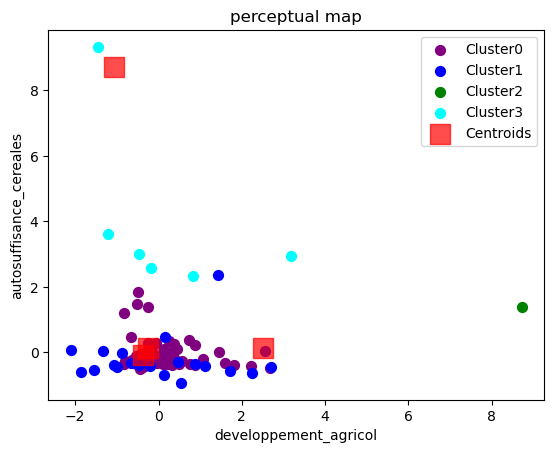

In [26]:
plan=(1,2)
plt.scatter(X[y_means==0][X.columns[plan[0]]],X[y_means==0][X.columns[plan[1]]],s=50, c='purple',label='Cluster0')
plt.scatter(X[y_means==1][X.columns[plan[0]]],X[y_means==1][X.columns[plan[1]]],s=50, c='blue',label='Cluster1')
plt.scatter(X[y_means==2][X.columns[plan[0]]],X[y_means==2][X.columns[plan[1]]],s=50, c='green',label='Cluster2')
plt.scatter(X[y_means==3][X.columns[plan[0]]],X[y_means==3][X.columns[plan[1]]],s=50, c='cyan',label='Cluster3')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

In [27]:
plan=(0,2)
plt.scatter(X[y_means==0][X.columns[plan[0]]],X[y_means==0][X.columns[plan[1]]],s=50, c='purple',label='Cluster0')
plt.scatter(X[y_means==1][X.columns[plan[0]]],X[y_means==1][X.columns[plan[1]]],s=50, c='blue',label='Cluster1')
plt.scatter(X[y_means==2][X.columns[plan[0]]],X[y_means==2][X.columns[plan[1]]],s=50, c='green',label='Cluster2')
plt.scatter(X[y_means==3][X.columns[plan[0]]],X[y_means==3][X.columns[plan[1]]],s=50, c='cyan',label='Cluster3')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

In [28]:
clust=X.groupby('clusters').agg(np.mean)
clust

developpement_general  developpement_agricol  \
clusters                                                 
0                     -0.375864              -0.092272   
1                      2.504920               0.134982   
2                     -1.061923               8.718723   
3                     -0.258578               0.119812   

          autosuffisance_cereales  
clusters                           
0                       -0.155355  
1                       -0.214893  
2                        1.392404  
3                        3.963754

In [29]:
plan=(0,1)
plt.scatter(clust[X.columns[plan[0]]][0],clust[X.columns[plan[1]]][0],s=50, marker='s', c='purple',label='Cluster0')
plt.scatter(clust[X.columns[plan[0]]][1],clust[X.columns[plan[1]]][1],s=50, marker='d', c='blue',label='Cluster1')
plt.scatter(clust[X.columns[plan[0]]][2],clust[X.columns[plan[1]]][2],s=50,marker='o', c='green',label='Cluster2')
plt.scatter(clust[X.columns[plan[0]]][3],clust[X.columns[plan[1]]][3],s=50,marker='p', c='red',label='Cluster3')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

In [30]:
plan=(0,2)
plt.scatter(clust[X.columns[plan[0]]][0],clust[X.columns[plan[1]]][0],s=50, marker='s', c='purple',label='Cluster0')
plt.scatter(clust[X.columns[plan[0]]][1],clust[X.columns[plan[1]]][1],s=50, marker='d', c='blue',label='Cluster1')
plt.scatter(clust[X.columns[plan[0]]][2],clust[X.columns[plan[1]]][2],s=50,marker='o', c='green',label='Cluster2')
plt.scatter(clust[X.columns[plan[0]]][3],clust[X.columns[plan[1]]][3],s=50,marker='p', c='red',label='Cluster3')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

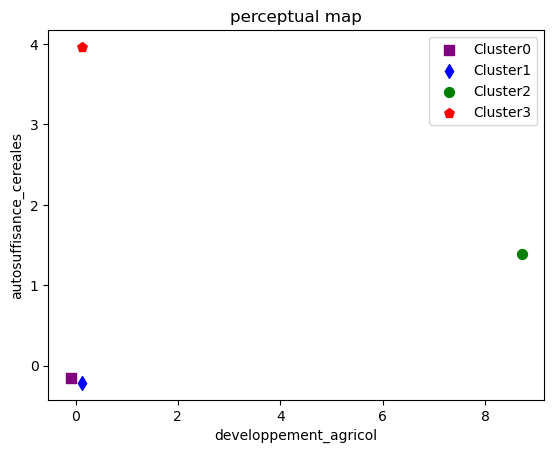

In [31]:
plan=(1,2)
plt.scatter(clust[X.columns[plan[0]]][0],clust[X.columns[plan[1]]][0],s=50, marker='s', c='purple',label='Cluster0')
plt.scatter(clust[X.columns[plan[0]]][1],clust[X.columns[plan[1]]][1],s=50, marker='d', c='blue',label='Cluster1')
plt.scatter(clust[X.columns[plan[0]]][2],clust[X.columns[plan[1]]][2],s=50,marker='o', c='green',label='Cluster2')
plt.scatter(clust[X.columns[plan[0]]][3],clust[X.columns[plan[1]]][3],s=50,marker='p', c='red',label='Cluster3')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

### pour le cluster 3 , developpement agricole faible , autosuffisance cereales moyenne et developpement generale fort
### cluster 2 => dev agricole fort , autosuffisance faible et dev gen faible
### cluster 1 => dev agricole moyen, autosuffisance forte et dev gen faible
### cluster 0 => dev agricole faible, autosuffisance faible et dev gen faible 

In [32]:
X[X.clusters==0]

developpement_general  developpement_agricol  \
Zone                                                                
Afghanistan                       0.231270              -0.613609   
Albanie                          -0.578822              -0.167036   
Algérie                          -0.135029              -0.126307   
Angola                           -0.094957              -0.398527   
Antigua-et-Barbuda               -0.493559              -0.277450   
...                                    ...                    ...   
Zambie                           -1.112096               0.363118   
Zimbabwe                         -0.081381              -0.453728   
Émirats arabes unis               0.526566              -0.362305   
Équateur                         -0.038725              -0.197620   
Îles Salomon                     -0.534823              -0.255297   

                     autosuffisance_cereales  clusters  
Zone                                                    
Afghanistan                        -0.234108         0  
Albanie                            -0.258953         0  
Algérie                            -0.204865         0  
Angola                             -0.097201         0  
Antigua-et-Barbuda                 -0.251615         0  
...                                      ...       ...  
Zambie                             -0.188888         0  
Zimbabwe                           -0.193505         0  
Émirats arabes unis                -0.455357         0  
Équateur                           -0.279945         0  
Îles Salomon                       -0.244659         0  

[133 rows x 4 columns]

In [33]:
X[X.clusters==0].sort_values(['developpement_agricol','developpement_general', 'autosuffisance_cereales'],
              ascending = [True, True, True])

developpement_general  developpement_agricol  \
Zone                                                                        
Panama                                    0.681704              -0.829648   
Burkina Faso                              0.022335              -0.819012   
Iraq                                      0.367196              -0.811856   
République-Unie de Tanzanie               0.305414              -0.664040   
République dominicaine                    0.414066              -0.661542   
...                                            ...                    ...   
Thaïlande                                -0.460640               1.454336   
Irlande                                  -2.216079               1.590311   
Danemark                                 -1.011179               1.813682   
République de Corée                      -1.036432               2.229654   
Belgique                                 -2.056633               2.679666   

                             autosuffisance_cereales  clusters  
Zone                                                            
Panama                                     -0.369862         0  
Burkina Faso                                1.212139         0  
Iraq                                       -0.257304         0  
République-Unie de Tanzanie                 0.479961         0  
République dominicaine                     -0.302182         0  
...                                              ...       ...  
Thaïlande                                   0.012092         0  
Irlande                                    -0.329264         0  
Danemark                                   -0.402469         0  
République de Corée                        -0.435806         0  
Belgique                                   -0.488250         0  

[133 rows x 4 columns]

In [34]:
X[X.clusters==1].sort_values(['developpement_agricol','developpement_general', 'autosuffisance_cereales'],
              ascending = [True, True, True])

developpement_general  \
Zone                                                                        
Indonésie                                                        4.704579   
Malaisie                                                         3.566340   
Pérou                                                            2.708908   
Bangladesh                                                       1.474589   
Égypte                                                           2.137426   
Arabie saoudite                                                  1.429102   
Myanmar                                                          2.450729   
Turquie                                                          3.212012   
Afrique du Sud                                                   1.812611   
Philippines                                                      2.120853   
Viet Nam                                                         3.446012   
Pakistan                                                         1.349527   
Mexique                                                          3.260092   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...               3.550256   
Australie                                                        1.968496   
Italie                                                           2.526120   
Fédération de Russie                                             5.012062   
Argentine                                                        1.480474   
Canada                                                           1.223886   
Espagne                                                          1.653399   
Japon                                                            1.515857   

                                                    developpement_agricol  \
Zone                                                                        
Indonésie                                                       -2.104819   
Malaisie                                                        -1.853431   
Pérou                                                           -1.551585   
Bangladesh                                                      -1.321000   
Égypte                                                          -1.064287   
Arabie saoudite                                                 -0.987902   
Myanmar                                                         -0.874574   
Turquie                                                         -0.670301   
Afrique du Sud                                                  -0.467554   
Philippines                                                     -0.195647   
Viet Nam                                                         0.142868   
Pakistan                                                         0.158468   
Mexique                                                          0.467032   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...               0.532787   
Australie                                                        0.872148   
Italie                                                           1.107807   
Fédération de Russie                                             1.436952   
Argentine                                                        1.706840   
Canada                                                           2.249133   
Espagne                                                          2.544521   
Japon                                                            2.707162   

                                                    autosuffisance_cereales  \
Zone                                                                          
Indonésie                                                          0.069721   
Malaisie                                                          -0.600625   
Pérou                                                             -0.534805   
Bangladesh                                                         0.039103   
Égypte                            

In [35]:
X[X.clusters==2].sort_values(['developpement_agricol','developpement_general', 'autosuffisance_cereales'],
              ascending = [True, True, True])

developpement_general  developpement_agricol  \
Zone                                                      
Allemagne              -1.061923               8.718723   

           autosuffisance_cereales  clusters  
Zone                                          
Allemagne                 1.392404         2

In [36]:
X[X.clusters==3].sort_values(['developpement_agricol','developpement_general', 'autosuffisance_cereales'],
              ascending = [True, True, True])

developpement_general  developpement_agricol  \
Zone                                                    
Niger                -0.637496              -1.445974   
Nigéria               1.046897              -1.207638   
Mali                 -0.306828              -0.472024   
Tchad                -0.635009              -0.178189   
Bélarus              -1.448417               0.834302   
France                0.429386               3.188396   

         autosuffisance_cereales  clusters  
Zone                                        
Niger                   9.327475         3  
Nigéria                 3.608944         3  
Mali                    2.992868         3  
Tchad                   2.584463         3  
Bélarus                 2.317765         3  
France                  2.951006         3